In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

from pandas.plotting import parallel_coordinates

In [2]:
data = pd.read_csv("merged_songs.csv")
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,genre,date,rank,last-week,peak-rank,weeks-on-board
0,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-09-02,96,90.0,9,20
1,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-26,90,85.0,9,19
2,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-19,85,77.0,9,18
3,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-12,77,49.0,9,17
4,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-05,49,35.0,9,16


In [3]:
numerical_cols = [
    'duration_ms', 'explicit', 'year', 'popularity', 'danceability', 
    'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'rank', 
    'last-week', 'peak-rank', 'weeks-on-board'
]
data = data.dropna(subset=numerical_cols)
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,genre,date,rank,last-week,peak-rank,weeks-on-board
0,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-09-02,96,90.0,9,20
1,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-26,90,85.0,9,19
2,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-19,85,77.0,9,18
3,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-12,77,49.0,9,17
4,Britney Spears,Oops!...I Did It Again,3.52,False,2000,77,0.751,0.834,1,-5.444,...,0.000018,0.355,0.894,95.053,pop,2000-08-05,49,35.0,9,16


In [4]:
data.shape

(18444, 23)

In [7]:
# Scale the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numerical_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Randomly sample a subset of indices (e.g., 2000 points)
sample_size = 2000
np.random.seed(42)  # for reproducibility
indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sample = X_scaled[indices, :]

In [8]:
# Apply MDS to the sampled data
mds = MDS(n_components=2, random_state=42)
mds_coords = mds.fit_transform(X_sample)

# Create a DataFrame for plotting
mds_df = pd.DataFrame(mds_coords, columns=['Dim1', 'Dim2'])
mds_df['cluster'] = data.iloc[indices]['cluster'].values

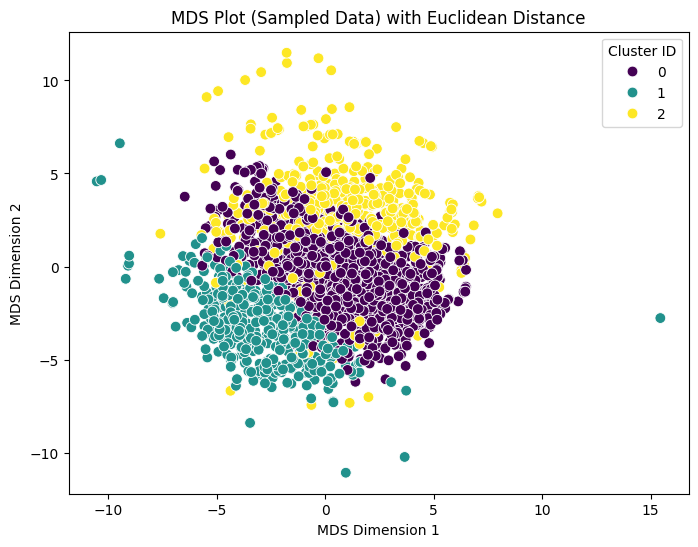

In [9]:
# Plot the MDS result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='cluster', palette='viridis', data=mds_df, s=60)
plt.title("MDS Plot (Sampled Data) with Euclidean Distance")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.legend(title="Cluster ID")
plt.show()

In [10]:
# ---------------------------
# 4. Task 4(b): MDS Plot for Variables (Features)
# ---------------------------
# Compute the correlation matrix among the numerical features
corr = data[numerical_cols].corr()

# Convert correlation to distance: d = 1 - |correlation|
distance = 1 - corr.abs()

In [11]:
# Compute MDS on the distance matrix (using precomputed dissimilarity)
mds_vars = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
vars_coords = mds_vars.fit_transform(distance)

# Create a DataFrame for the variables' coordinates
vars_df = pd.DataFrame(vars_coords, index=numerical_cols, columns=['Dim1', 'Dim2'])

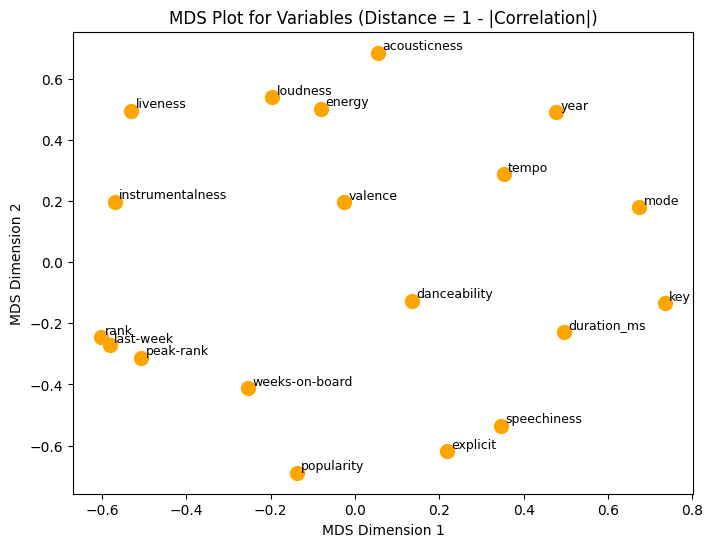

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(vars_df['Dim1'], vars_df['Dim2'], s=100, color='orange')
for var in vars_df.index:
    plt.text(vars_df.loc[var, 'Dim1']+0.01, vars_df.loc[var, 'Dim2']+0.01, var, fontsize=9)
plt.title("MDS Plot for Variables (Distance = 1 - |Correlation|)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

In [13]:
# ---------------------------
# 5. Task 5 & 6: Parallel Coordinates Plot (PCP)
# ---------------------------
# For the parallel coordinates plot, we include all data dimensions (both numerical and categorical)
# First, convert non-numerical (categorical) columns to category codes.
categorical_cols = [col for col in data.columns if col not in numerical_cols + ['cluster']]
data_pc = data.copy()
for col in categorical_cols:
    data_pc[col] = data_pc[col].astype('category').cat.codes

In [14]:

# Determine a meaningful axes ordering:
# For numerical features, we order them based on the x-coordinate (Dim1) from the variables MDS plot
sorted_numerical = vars_df.sort_values('Dim1').index.tolist()

# Final axes order: categorical columns first, then the ordered numerical columns
final_order = categorical_cols + sorted_numerical

# Ensure the 'cluster' column is included for coloring
if 'cluster' not in final_order:
    final_order.append('cluster')

data_pc = data_pc[final_order]

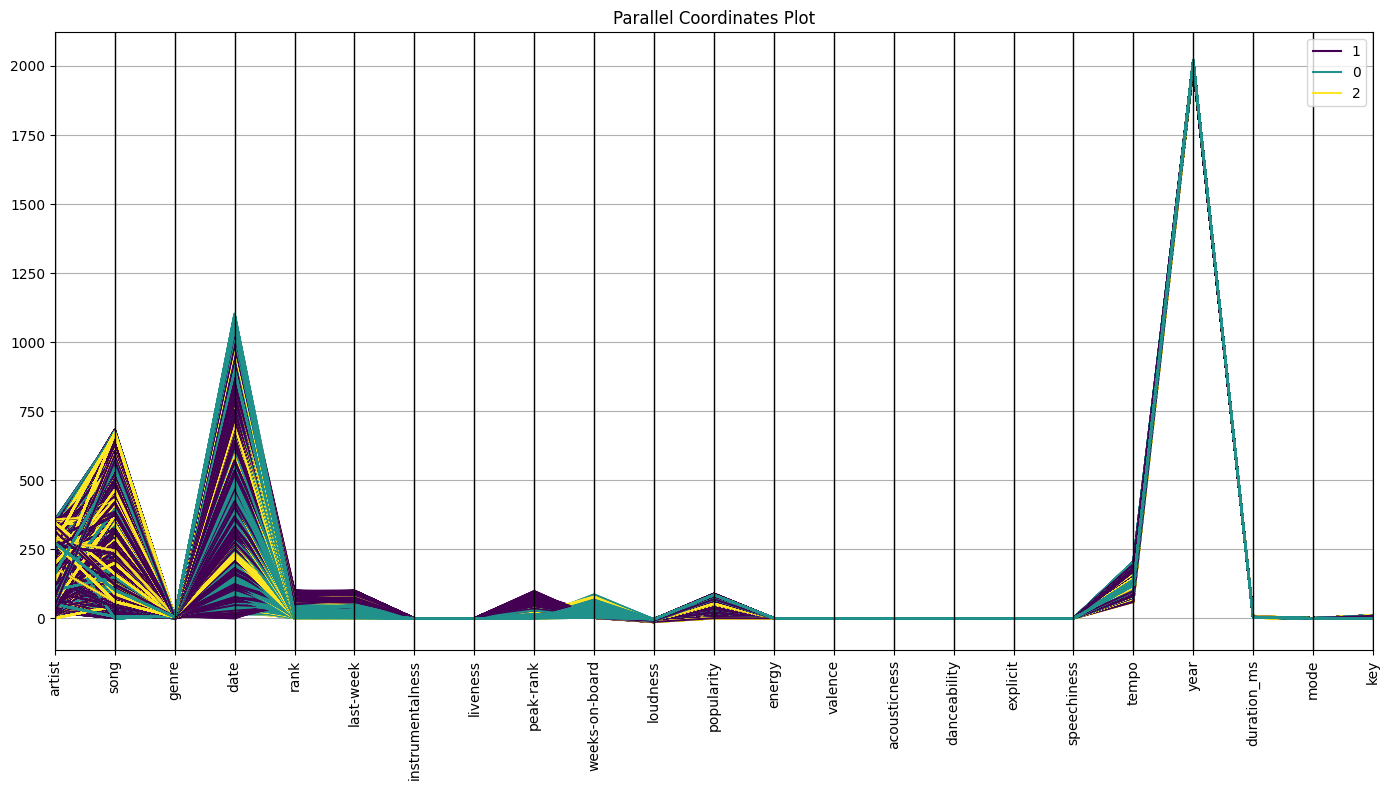

In [15]:
plt.figure(figsize=(14,8))
parallel_coordinates(data_pc, class_column='cluster', colormap=plt.get_cmap("viridis"))
plt.title("Parallel Coordinates Plot")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()